In [1]:
import random 
from env import StaticGridEnv
import numpy as np
import matplotlib.pyplot as plt

#seeding for reproducibility
random.seed(42)

#environment variables
numActions = 4
validActions = [0, 1, 2, 3]
numStates = 10*10 #10x10 grid

#setting up Q-table
q = np.zeros((numStates, numActions))


pygame 2.6.1 (SDL 2.30.7, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


Episode:  0
0  not successful
Episode:  1
1  not successful
Episode:  2
2  not successful
Episode:  3
3  not successful
Episode:  4
4  successful
4  not successful
Episode:  5
5  not successful
Episode:  6
6  not successful
Episode:  7
7  not successful
Episode:  8
8  not successful
Episode:  9
9  not successful
Episode:  10
10  not successful
Episode:  11
11  not successful
Episode:  12
12  not successful
Episode:  13
13  not successful
Episode:  14
14  not successful
Episode:  15
15  not successful
Episode:  16
16  not successful
Episode:  17
17  not successful
Episode:  18
18  not successful
Episode:  19
19  not successful
Episode:  20
20  not successful
Episode:  21
21  successful
21  not successful
Episode:  22
22  not successful
Episode:  23
23  not successful
Episode:  24
24  not successful
Episode:  25
25  not successful
Episode:  26
26  not successful
Episode:  27
27  not successful
Episode:  28
28  not successful
Episode:  29
29  not successful
Episode:  30
30  not successful

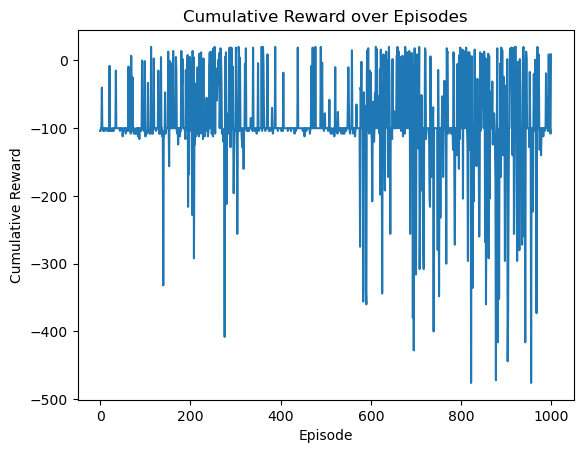

Total Rewards per Episode: [-104, -104, -100, -100, -40, -100, -100, -104, -100, -100, -104, -100, -100, -100, -100, -100, -104, -104, -100, -104, -100, -8, -104, -100, -100, -104, -104, -104, -100, -100, -104, -100, -100, -100, -100, -15, -100, -100, -100, -100, -100, -100, -100, -100, -104, -100, -100, -100, -100, -100, -112, -104, -100, -100, -104, -104, -100, -108, -100, -100, -100, -104, -104, -9, -100, -100, -100, -104, -108, 7, -100, -104, -25, -104, -104, -108, -100, -104, -108, -104, -108, -100, -100, -100, -112, -100, -100, -116, -100, -104, -104, -104, -100, 0, -100, -100, -100, -104, -100, -1, -112, -112, -104, -104, -108, -104, -33, -100, -100, -100, -108, -100, -108, 20, -104, -100, -108, -108, -100, 3, -100, -100, -100, -100, -104, -100, -100, -100, -100, -15, -100, -108, -104, -108, -100, 5, -108, -100, -112, -104, -332, -116, -104, -108, -47, -108, -100, -100, -100, -100, -100, 13, -100, -156, -59, -1, -100, -100, -100, -100, -4, -100, 14, -100, -100, -100, -100, -100,

In [2]:
# Initialize the environment
env = StaticGridEnv(42)

# Params
#epsilon = 1.0
epsilon = 0.1
maxEpsilon = 1.0
minEpsilon = 0.01
decay_rate = 0.01

alpha = 0.8    # Learning rate
gamma = 0.95   # Discount factor
num_episodes = 1000
max_steps_per_episode = 100


# Metrics
total_rewards_per_episode = []
steps_per_episode = []
successful_episodes = 0

for episode in range(num_episodes):
    print(f"Episode: ", episode)
    twodimState = env.reset()
    state = twodimState[0]*10 + twodimState[1]
    done = False
    total_rewards = 0
    steps = 0
    action = 0
    
    explore = True
    
    for step in range(max_steps_per_episode):
        # Choose an action (epsilon-greedy policy)
        if random.uniform(0, 1) > epsilon: # Exploit
            #print(q[state, :])
            #print(np.argmax(q[state, :]))
            action =  np.argmax(q[state, :])
            explore = False
        else: # Explore
            action = random.choice(validActions)
            explore = True

        # Take the action
        next_state, reward, done, _ = env.step(action)

        # Update Q-table
        q[state, action] = q[state, action] + alpha * (reward + gamma * np.max(q[next_state, :]) - q[state, action])

        # Update metrics
        total_rewards += reward
        steps += 1

        # Render the environment (optional)
        #env.render(episode=episode, learning_type="Q-learning")

        # Transition to the next state
        twodimState = next_state

        if done:
            successful_episodes += 1
            print(episode, " successful" )
            break

    # Track metrics
    total_rewards_per_episode.append(total_rewards)
    steps_per_episode.append(steps)

    # Decay epsilon
    #epsilon = minEpsilon + (maxEpsilon - minEpsilon) * np.exp(-decay_rate*episode)
    
    print(episode, " not successful" )



# Close the environment
env.close()

#Calculate Success Rate
success_rate = (successful_episodes / num_episodes) * 100

# Calculate Average Reward per Episode
average_reward = np.mean(total_rewards_per_episode)

# Calculate Average Learning Speed (ALS)
average_learning_speed = 1 / np.mean(steps_per_episode)

# Print metrics
print(f"Success Rate: {success_rate}%")
print(f"Average Reward per Episode: {average_reward}")
print(f"Average Learning Speed: {average_learning_speed}")

# Save metrics to a file
with open("metrics.txt", "w") as f:
    f.write(f"Success Rate: {success_rate}%\n")
    f.write(f"Average Reward per Episode: {average_reward}\n")
    f.write(f"Average Learning Speed: {average_learning_speed}\n")

plt.plot(total_rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Episodes')
plt.show()
# Print metrics
print(f"Total Rewards per Episode: {total_rewards_per_episode}")
print(f"Steps per Episode: {steps_per_episode}")
print(f"Number of Successful Episodes: {successful_episodes}")